In [6]:
import sys
sys.path.append("../") # adding the path to read the utils file
from sklearnex import patch_sklearn
patch_sklearn(global_patch=True)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, tree
from shap import TreeExplainer
import fasttreeshap
from shap import plots, Explanation
import graphviz 
from yellowbrick.model_selection import LearningCurve
import time
import shap
from utils import *
import pickle

pd.set_option('display.max_columns', None)

Scikit-learn was successfully globally patched by Intel(R) Extension for Scikit-learn


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [7]:
ds = pd.read_parquet("../datasets/CICIDS-2017.parquet")
ds.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
0,6.0,1266342.0,41.0,44.0,2664.0,6954.0,456.0,0.0,64.975609,109.864571,976.0,0.0,158.045456,312.675262,7595.104640,67.122468,15075.50000,104051.399700,948537.0,0.0,1266342.0,31658.550,159355.2595,996324.0,2.0,317671.0,7387.697674,19636.44809,104616.0,1.0,0.0,0.0,0.0,0.0,1328.0,1424.0,32.376720,34.745748,0.0,976.0,111.837212,239.686844,57449.78495,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,113.152939,64.975609,158.045456,1328.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,2664.0,44.0,6954.0,29200.0,243.0,24.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,False
1,6.0,1319353.0,41.0,44.0,2664.0,6954.0,456.0,0.0,64.975609,109.864571,976.0,0.0,158.045456,312.675262,7289.936810,64.425518,15706.58333,104861.870100,955790.0,1.0,1319353.0,32983.825,159247.9008,996423.0,1.0,363429.0,8451.837209,21337.26261,104815.0,1.0,0.0,0.0,0.0,0.0,1328.0,1424.0,31.075838,33.349680,0.0,976.0,111.837212,239.686844,57449.78495,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,113.152939,64.975609,158.045456,1328.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,2664.0,44.0,6954.0,29200.0,243.0,24.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,False
2,6.0,160.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,12500.000000,160.00000,0.000000,160.0,160.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,32.0,32.0,6250.000000,6250.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,32.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,290.0,243.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,False
3,6.0,1303488.0,41.0,42.0,2728.0,6634.0,456.0,0.0,66.536583,110.129944,976.0,0.0,157.952377,319.121429,7182.267884,63.675308,15896.19512,106554.899000,956551.0,0.0,1303488.0,32587.200,160397.0499,997357.0,1.0,346851.0,8459.780488,23962.23892,138295.0,0.0,0.0,0.0,0.0,0.0,1328.0,1360.0,31.454068,32.221240,0.0,976.0,111.452377,241.642792,58391.23867,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,112.795181,66.536583,157.952377,1328.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,2728.0,42.0,6634.0,29200.0,243.0,24.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,False
4,6.0,77.0,1.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,38961.038960,38.50000,14.849242,49.0,28.0,0.0,0.000,0.0000,0.0,0.0,49.0,49.000000,0.00000,49.0,49.0,0.0,0.0,0.0,0.0,32.0,64.0,12987.012990,25974.025970,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.000000,0.000000,0.000000,32.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,243.0,290.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,False


We can see from this graph that we don't have highly correlated features.

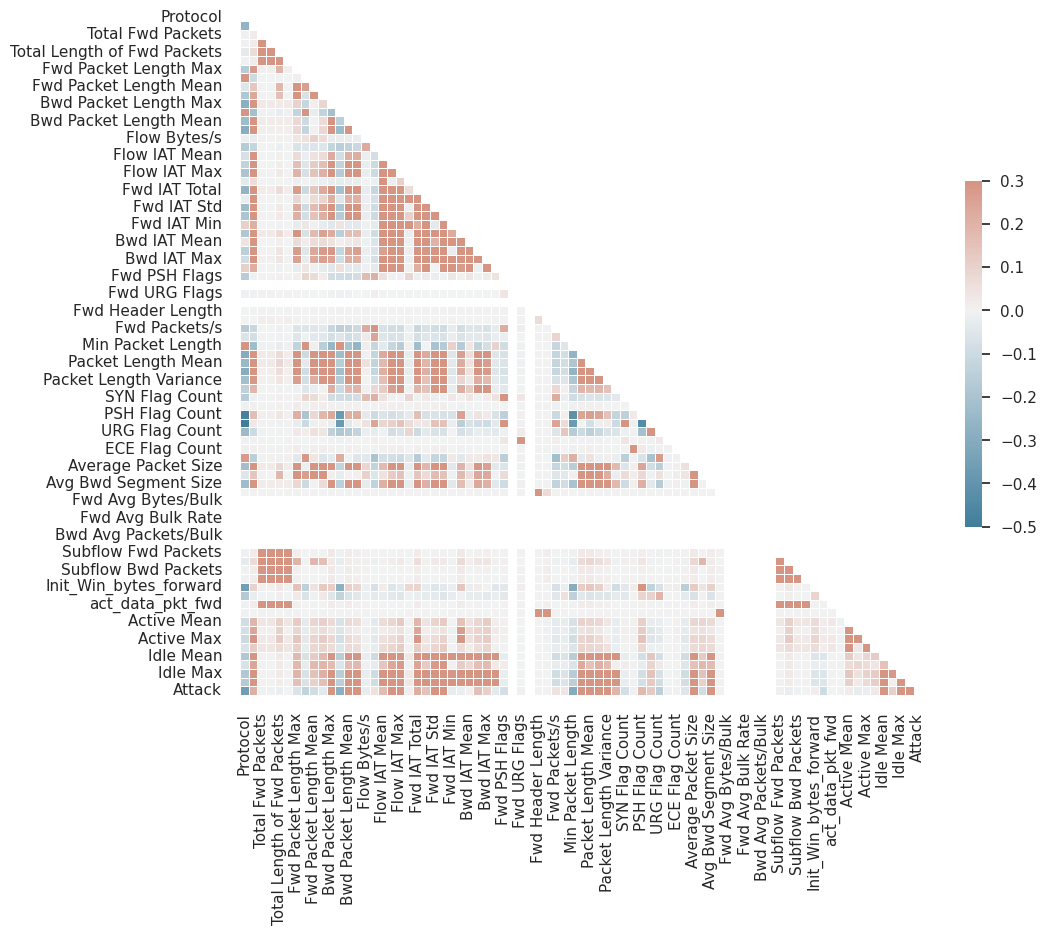

In [3]:
show_corr_matrix(ds)

In [4]:
compute_ratio(ds,'Label')

                           Ratio
Label                           
BENIGN                     80.32
DoS Hulk                    8.14
PortScan                    5.62
DDoS                        4.53
DoS GoldenEye               0.36
FTP-Patator                 0.28
SSH-Patator                 0.21
DoS slowloris               0.20
DoS Slowhttptest            0.19
Bot                         0.07
Web Attack  Brute Force     0.05
Web Attack  XSS             0.02
Infiltration                0.00
Web Attack  Sql Injection   0.00
Heartbleed                  0.00


In [5]:
ds.Label.value_counts()

Label
BENIGN                       2271122
DoS Hulk                      230123
PortScan                      158804
DDoS                          128025
DoS GoldenEye                  10293
FTP-Patator                     7935
SSH-Patator                     5897
DoS slowloris                   5796
DoS Slowhttptest                5499
Bot                             1956
Web Attack  Brute Force         1507
Web Attack  XSS                  652
Infiltration                      36
Web Attack  Sql Injection         21
Heartbleed                        11
Name: count, dtype: int64

In [ ]:
params = {
    "n_jobs": -1, 
    "n_estimators": 5,
    "max_depth": 14,
    "random_state": 42,
    "max_features": len(x_features)
}

In [ ]:
rf = RandomForestClassifier(**params)
pv = DataPreprocessingAndValidation(ds, 7988, 5, RandomForestClassifier, params)

In [ ]:
X_res, y_res = pv.get_undersampled_ds()
X_train, X_test, y_train, y_test = train_test_split(X_res, ds.loc[y_res.index].Label, test_size = 0.2, random_state=12,  stratify=y_res)

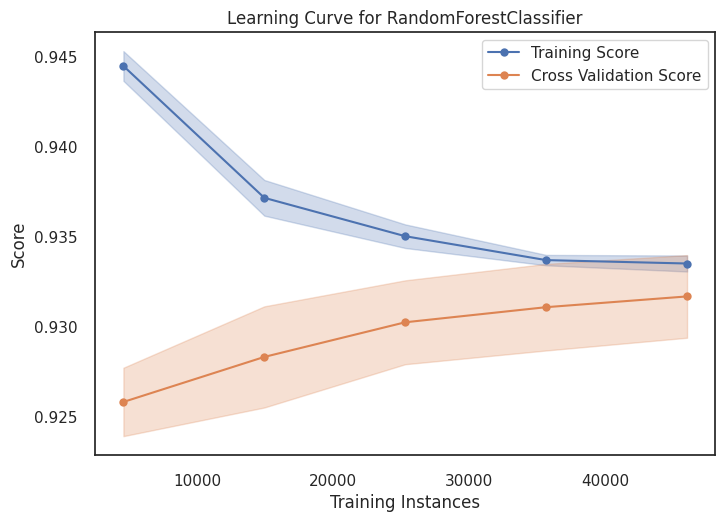

In [ ]:
if False:
    cv = 10
    visualizer = LearningCurve(estimator=rf, cv=cv, scoring='f1', n_jobs=1, random_state=123)
    visualizer.fit(X_train, y_train)
    visualizer.show(outpath="rf_data/learning_curve.png")


![Alt text](rf_data/learning_curve.png)

In [ ]:
%time pv.cross_validation(ds[x_features], ds.Label, y_res)

Running the stratified 5-fold
Test and Train k-fold created
Running the cross validation
CPU times: user 50.3 s, sys: 192 ms, total: 50.4 s
Wall time: 12.6 s


(0.9315805245846793, 0.0018062411441493245, 12.155797719955444)

In [ ]:
%time rf.fit(X_train, y_train)

CPU times: user 10.2 s, sys: 15.6 ms, total: 10.3 s
Wall time: 2.33 s


RandomForestClassifier(max_depth=14, max_features=79, n_estimators=5, n_jobs=-1,
                       random_state=42)

In [ ]:
%time y_predicted_train = rf.predict(X_train)
%time y_predicted_test = rf.predict(X_test)

CPU times: user 57.5 ms, sys: 331 µs, total: 57.8 ms
Wall time: 44 ms
CPU times: user 21.6 ms, sys: 0 ns, total: 21.6 ms
Wall time: 21.8 ms


In [ ]:
performanceMetricsDF(metrics, y_train, y_predicted_train, y_test, y_predicted_test)

,Measure,Train,Test
0,ACCURACY,0.928760,0.926610
1,PRECISION,0.875544,0.874057
2,RECALL,0.999609,0.996871
3,F1 SCORE,0.933472,0.931433
4,AUC,0.928761,0.926604


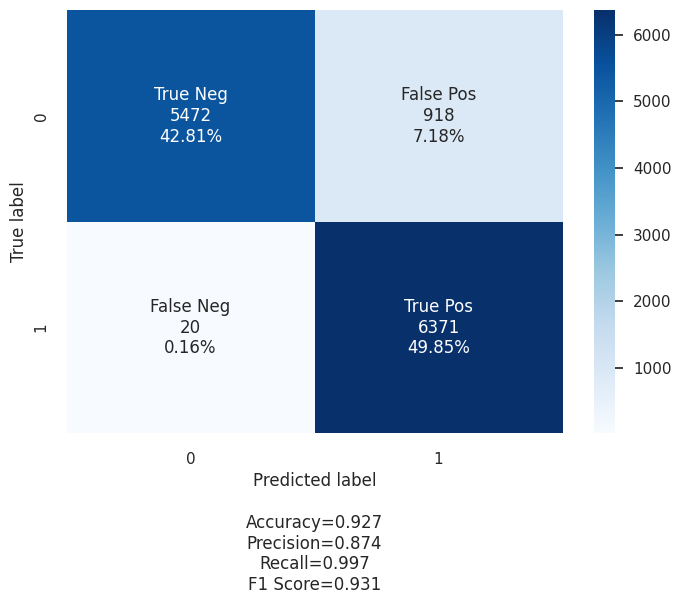

In [ ]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_predicted_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
for num, clf in enumerate(rf.estimators_):
    print(clf.get_depth())

14
14
14
14
14


In [ ]:
for num, clf in enumerate(rf.estimators_):
    dot_data = tree.export_graphviz(clf, feature_names=x_features, out_file=None, ) 
    graph = graphviz.Source(dot_data)
    graph.render('tree/tree_rf_' + str(num))

In [ ]:
start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.020 seconds


Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


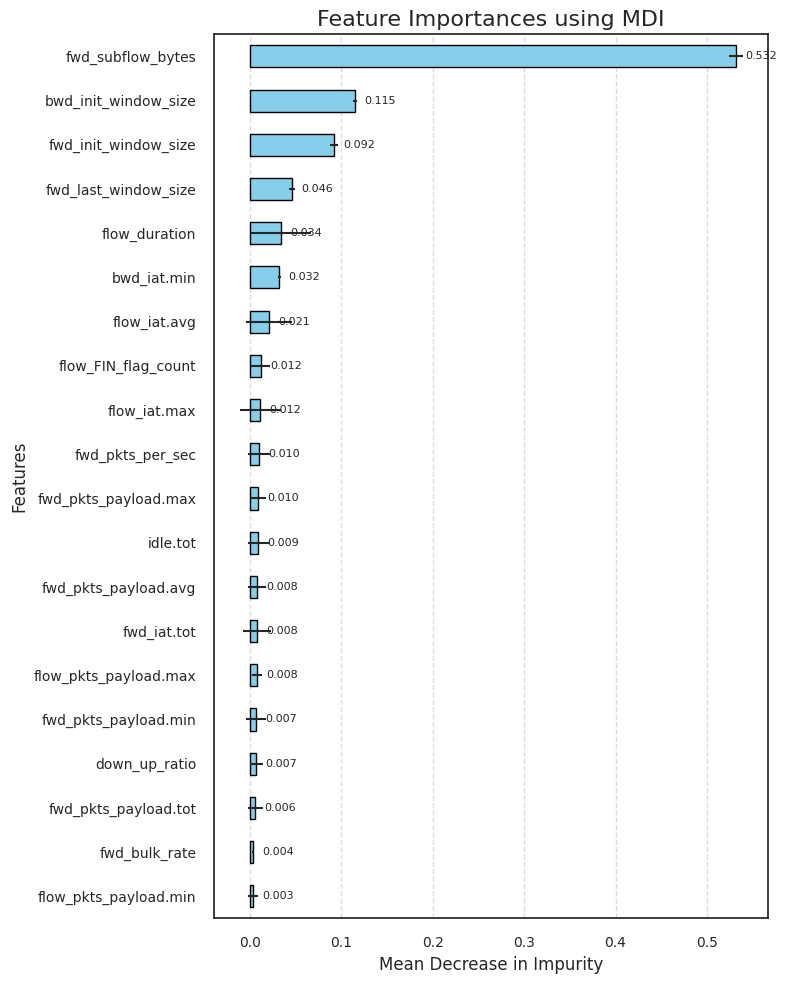

In [ ]:
forest_importances = pd.Series(importances, index=x_features)

sorted_indices = np.argsort(forest_importances)[::-1]
sorted_std = std[sorted_indices][:20] # Select only the first 20 features
sorted_importance = forest_importances[sorted_indices][:20]  # Select importance values for the first 20 features

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 10))  # Adjust the figure size as needed for vertical display

# Create the vertical bar plot with error bars
sorted_importance.plot(kind='barh', xerr=sorted_std, ax=ax, color='skyblue', edgecolor='black')

# Set plot title and labels
ax.set_title("Feature Importances using MDI", fontsize=16)
ax.set_xlabel("Mean Decrease in Impurity", fontsize=12)
ax.set_ylabel("Features", fontsize=12)

# Customize ticks and grid
ax.tick_params(axis='both', which='major', labelsize=10)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Invert y-axis to display most important feature at the top
ax.invert_yaxis()

# Add data labels at the end of each bar
for i, v in enumerate(sorted_importance):
    ax.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()

Using interventional to stay "true to the model" since we will use this data to do feature reduction and we want also to understand how things work

In [ ]:
%%time

explainer = fasttreeshap.TreeExplainer(rf, X_train, algorithm='auto', n_jobs=-1, feature_perturbation="interventional") 
sv = explainer(X_train)

exp = Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=X_train, 
                  feature_names=x_features)

 98%|===================| 99957/102246 [00:44<00:01]        

CPU times: user 44 s, sys: 202 ms, total: 44.2 s
Wall time: 44.1 s


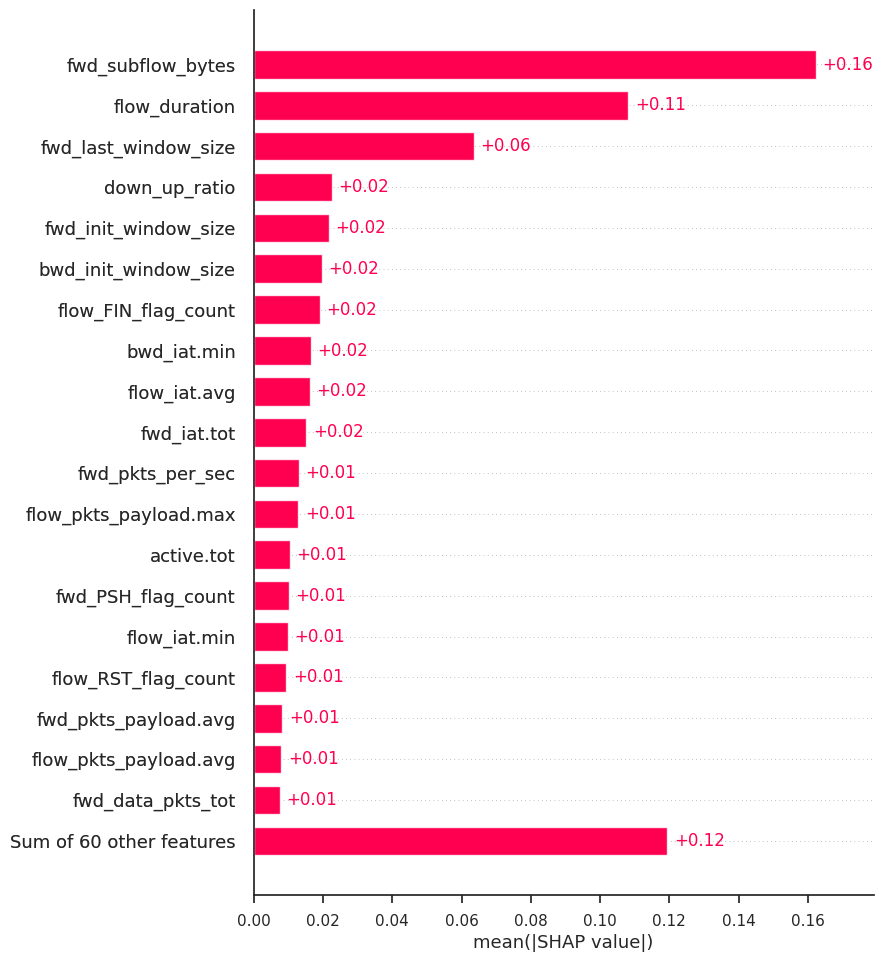

In [ ]:
plots.bar(exp, max_display=20, show=False)
# plt.savefig('tree/shap', dpi=1400, format='pdf', pad_inches=10)
plt.show()

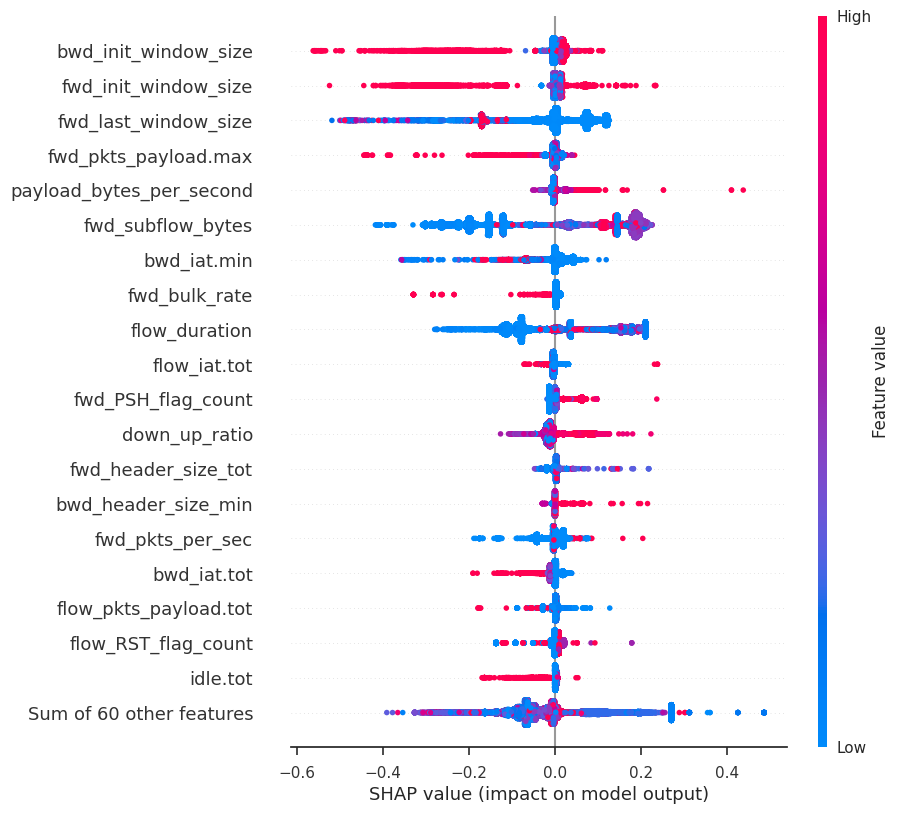

In [ ]:
plots.beeswarm(exp,order=exp.abs.max(0),max_display=20)

In [ ]:
pv.feature_importance = pd.DataFrame(data={'importance' : exp.abs.mean(0).values, 'feature': x_features})
pv.feature_importance.sort_values('importance',ascending=False).head(20)

,importance,feature
58,0.162358,fwd_subflow_bytes
0,0.108117,flow_duration
78,0.063545,fwd_last_window_size
8,0.022609,down_up_ratio
76,0.021619,fwd_init_window_size
77,0.019739,bwd_init_window_size
15,0.019075,flow_FIN_flag_count
45,0.016564,bwd_iat.min
53,0.016299,flow_iat.avg
42,0.015207,fwd_iat.tot


In [ ]:
pv.feature_above_zero = pv.feature_importance.query('importance > 0').sort_values('importance',ascending=False)['feature'].to_list()

In [ ]:
%%time

if False:
    result = pv.recursive_reduction()
    feature_reduction_scores = pd.DataFrame({'F1_score': result[0], 'score_std': result[1], 'n_features': result[2], 'cv_time': result[3]})
    
    with open('rf_data/feature_reduction_scores.pickle', 'wb') as handle:
        pickle.dump(feature_reduction_scores, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open('rf_data/feature_reduction_scores.pickle', 'rb') as handle:
        feature_reduction_scores = pickle.load(handle)

Running the cross validation
testing with 65 features
Running the cross validation
testing with 64 features
Running the cross validation
testing with 63 features
Running the cross validation
testing with 62 features
Running the cross validation
testing with 61 features
Running the cross validation
testing with 60 features
Running the cross validation
testing with 59 features
Running the cross validation
testing with 58 features
Running the cross validation
testing with 57 features
Running the cross validation
testing with 56 features
Running the cross validation
testing with 55 features
Running the cross validation
testing with 54 features
Running the cross validation
testing with 53 features
Running the cross validation
testing with 52 features
Running the cross validation
testing with 51 features
Running the cross validation
testing with 50 features
Running the cross validation
testing with 49 features
Running the cross validation
testing with 48 features
Running the cross validation

<Axes: xlabel='n_features', ylabel='cv_time'>

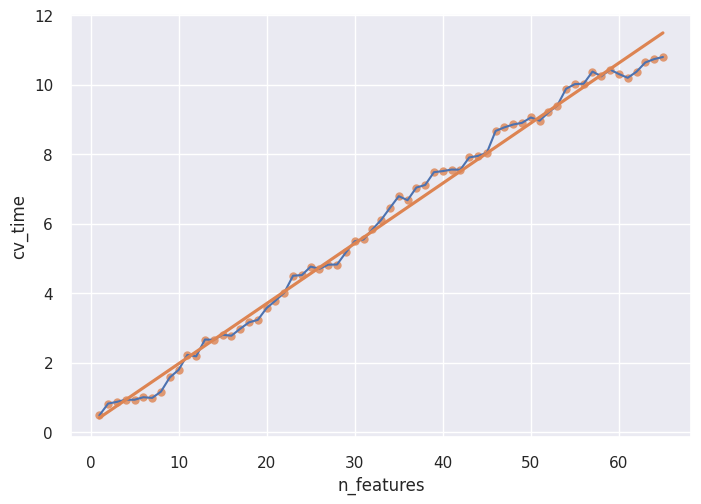

In [ ]:
sns.set_theme()
sns.lineplot(data=feature_reduction_scores, x="n_features", y="cv_time")
sns.regplot(data=feature_reduction_scores, x="n_features", y="cv_time", ci=None)  # ci=None removes confidence intervals

<Axes: xlabel='n_features', ylabel='F1_score'>

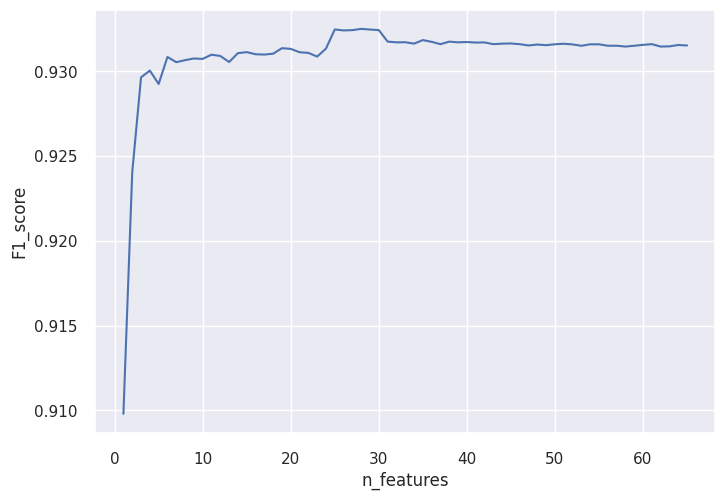

In [ ]:
sns.set_theme()
sns.lineplot(data=feature_reduction_scores, x="n_features", y="F1_score")

<Axes: xlabel='n_features', ylabel='score_std'>

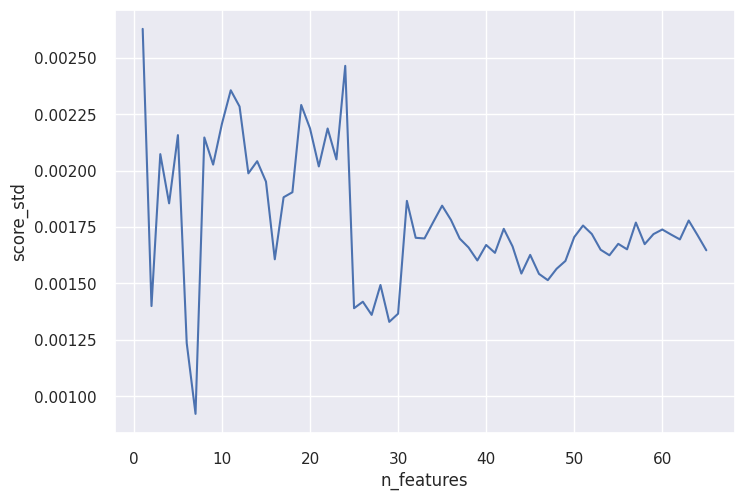

In [ ]:
sns.set_theme()
sns.lineplot(data=feature_reduction_scores, x="n_features", y="score_std")

In [ ]:
feature_reduction_scores.sort_values('F1_score', ascending=False)

,F1_score,score_std,n_features,cv_time
37,0.932505,0.001493,28,4.827316
40,0.932471,0.001390,25,4.766278
36,0.932465,0.001330,29,5.176635
35,0.932432,0.001366,30,5.496327
38,0.932430,0.001361,27,4.822903
...,...,...,...,...
61,0.930044,0.001856,4,0.934743
62,0.929645,0.002074,3,0.872749
60,0.929255,0.002158,5,0.933876
63,0.924034,0.001400,2,0.823524


In [ ]:
%%time

if False:
    zero_day_feature_reduction_scores = pv.run_zero_day_test()
    with open('rf_data/zero_day_feature_reduction_scores.pickle', 'wb') as handle:
        pickle.dump(zero_day_feature_reduction_scores, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open('rf_data/zero_day_feature_reduction_scores.pickle', 'rb') as handle:
        zero_day_feature_reduction_scores = pickle.load(handle)

traing for  XMRIGCC CryptoMiner
training with 65 features
Running the stratified 5-fold
Test and Train k-fold created
Running the cross validation
training with 64 features
Running the cross validation
training with 63 features
Running the cross validation
training with 62 features
Running the cross validation
training with 61 features
Running the cross validation
training with 60 features
Running the cross validation
training with 59 features
Running the cross validation
training with 58 features
Running the cross validation
training with 57 features
Running the cross validation
training with 56 features
Running the cross validation
training with 55 features
Running the cross validation
training with 54 features
Running the cross validation
training with 53 features
Running the cross validation
training with 52 features
Running the cross validation
training with 51 features
Running the cross validation
training with 50 features
Running the cross validation
training with 49 features
Ru

Here we can have zero on the results of f1 and recall that means that the model has failed to detect the attack, while the cross validation result is usefull only to see how well the model is scoring with all the data except the one regarding the attack

In [ ]:
# here I create this detected variable, so that we can see how many attacks are detected because only by using the mean we didn't get the best one
zero_day_feature_reduction_scores['detected'] = np.where(zero_day_feature_reduction_scores['attack_recall'] > 0, 1, 0)

In [ ]:
zero_day_feature_reduction_scores.query('attack_recall != 0').sort_values('attack_recall', ascending=False)

,attack_f1,attack_recall,attack_precision,cv_score_avg,cv_score_std,n_features,attack_name,fit_time,pred_time,detected
254,0.523662,0.401728,0.751874,0.934131,0.002563,6,Bruteforce-XML,0.134217,0.016505,1
253,0.505037,0.382824,0.741873,0.933914,0.002941,7,Bruteforce-XML,0.145773,0.014449,1
252,0.481537,0.359164,0.730397,0.933835,0.002571,8,Bruteforce-XML,0.151595,0.014858,1
184,0.450073,0.329244,0.711003,0.935399,0.004142,11,Bruteforce,0.307422,0.016345,1
259,0.429721,0.314221,0.679480,0.905142,0.004347,1,Bruteforce-XML,0.061743,0.015186,1
...,...,...,...,...,...,...,...,...,...,...
99,0.000231,0.000125,0.001479,0.955786,0.003928,31,Probing,0.795399,0.015727,1
102,0.000231,0.000125,0.001513,0.956410,0.003709,28,Probing,0.775730,0.015954,1
103,0.000231,0.000125,0.001513,0.956233,0.003347,27,Probing,0.778029,0.017741,1
88,0.000231,0.000125,0.001481,0.955325,0.003834,42,Probing,1.136118,0.019597,1


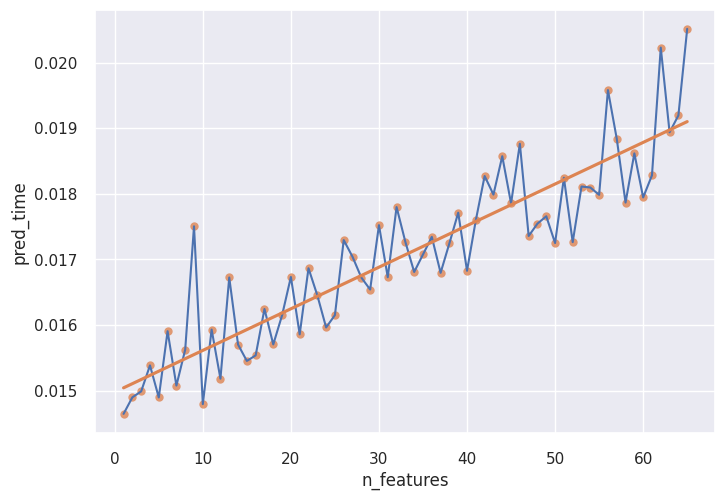

In [ ]:
def print_plot():
    data = zero_day_feature_reduction_scores.groupby('n_features')[['pred_time','n_features']].mean().query('n_features < 79')
    sns.set_theme()
    sns.lineplot(data=data, x=data.index, y='pred_time')
    sns.regplot(data=data, x="n_features", y="pred_time", ci=None)  # ci=None removes confidence intervals

print_plot()

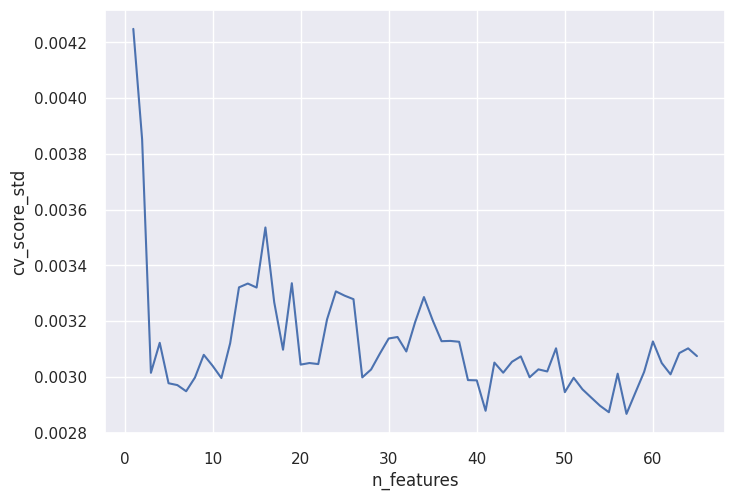

In [ ]:
def print_plot():
    data = zero_day_feature_reduction_scores.groupby('n_features')[['cv_score_std','n_features']].mean().query('n_features < 79')
    sns.set_theme()
    sns.lineplot(data=data, x=data.index, y='cv_score_std')

print_plot()

In [ ]:
zero_day_feature_reduction_scores.groupby('n_features')[['attack_f1','attack_recall','attack_precision','cv_score_avg','cv_score_std','fit_time','pred_time', 'detected']].mean().sort_values(['attack_recall', 'attack_precision'], ascending=False)

,attack_f1,attack_recall,attack_precision,cv_score_avg,cv_score_std,fit_time,pred_time,detected
n_features,,,,,,,,
8,0.208937,0.150851,0.343679,0.947036,0.002997,0.162026,0.015623,0.50
11,0.192413,0.136017,0.335171,0.947493,0.002996,0.322359,0.015929,0.75
9,0.151595,0.101652,0.300349,0.947487,0.003079,0.216072,0.017504,0.50
6,0.131248,0.100620,0.189411,0.947950,0.002970,0.132651,0.015905,0.50
10,0.149113,0.099618,0.298288,0.947425,0.003040,0.261942,0.014793,0.50
...,...,...,...,...,...,...,...,...
47,0.009889,0.005696,0.037554,0.948681,0.003027,1.377082,0.017356,0.75
58,0.009889,0.005696,0.037554,0.948721,0.002943,1.673337,0.017865,0.75
52,0.009891,0.005696,0.037618,0.948828,0.002955,1.484209,0.017262,0.75


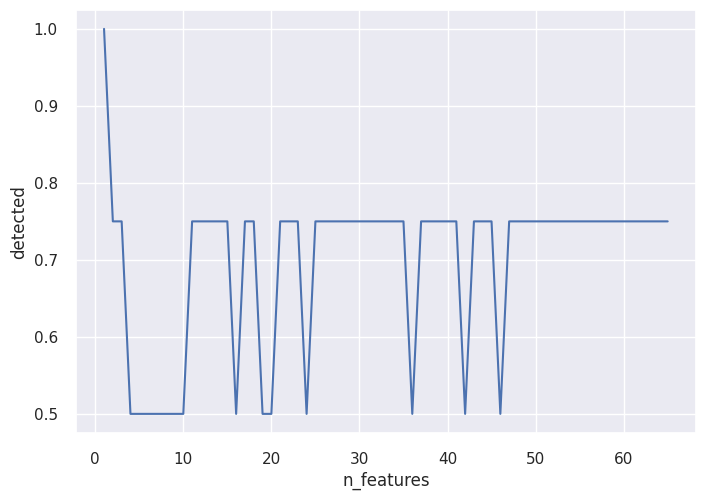

In [ ]:
def print_plot():
    data = zero_day_feature_reduction_scores.groupby('n_features')[['detected','n_features']].mean().query('n_features < 79')
    sns.set_theme()
    sns.lineplot(data=data, x=data.index, y='detected')

print_plot()

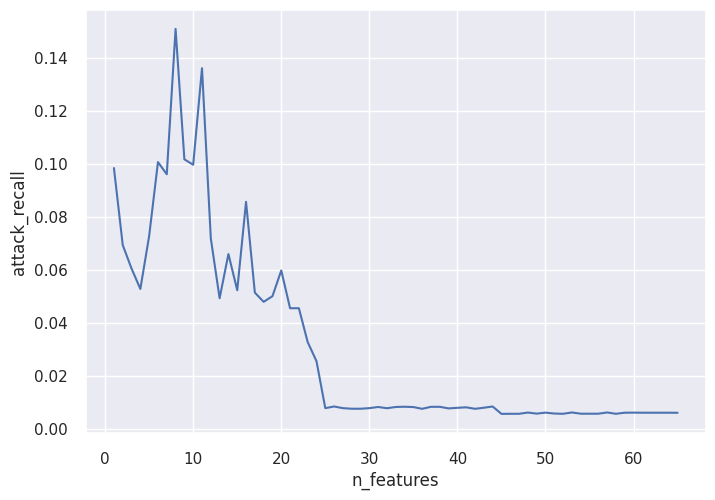

In [ ]:
def print_plot():
    data = zero_day_feature_reduction_scores.groupby('n_features')[['attack_recall','n_features']].mean().query('n_features < 79')
    sns.set_theme()
    sns.lineplot(data=data, x=data.index, y='attack_recall')

print_plot()

In [ ]:
zero_day_feature_reduction_scores.groupby('n_features')[['attack_f1','attack_recall','attack_precision','cv_score_avg','cv_score_std','fit_time','pred_time', 'detected']].mean().sort_values('attack_f1', ascending=False)

,attack_f1,attack_recall,attack_precision,cv_score_avg,cv_score_std,fit_time,pred_time,detected
n_features,,,,,,,,
8,0.208937,0.150851,0.343679,0.947036,0.002997,0.162026,0.015623,0.50
11,0.192413,0.136017,0.335171,0.947493,0.002996,0.322359,0.015929,0.75
9,0.151595,0.101652,0.300349,0.947487,0.003079,0.216072,0.017504,0.50
10,0.149113,0.099618,0.298288,0.947425,0.003040,0.261942,0.014793,0.50
1,0.141054,0.098366,0.287191,0.924940,0.004248,0.055995,0.014644,1.00
...,...,...,...,...,...,...,...,...
52,0.009891,0.005696,0.037618,0.948828,0.002955,1.484209,0.017262,0.75
58,0.009889,0.005696,0.037554,0.948721,0.002943,1.673337,0.017865,0.75
47,0.009889,0.005696,0.037554,0.948681,0.003027,1.377082,0.017356,0.75


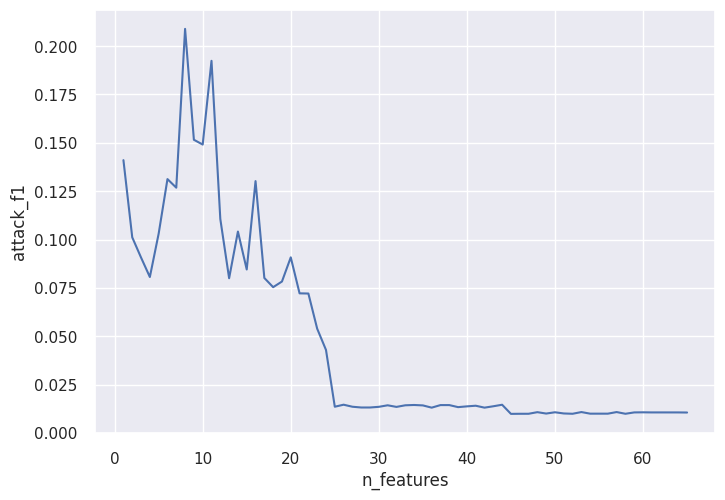

In [ ]:
def print_plot():
    data = zero_day_feature_reduction_scores.groupby('n_features')[['attack_f1','n_features']].mean().query('n_features < 79')
    sns.set_theme()
    sns.lineplot(data=data, x=data.index, y='attack_f1')

print_plot()

In [ ]:
zero_day_feature_reduction_scores.query('n_features == 8')

,attack_f1,attack_recall,attack_precision,cv_score_avg,cv_score_std,n_features,attack_name,fit_time,pred_time,detected
57,0.000000,0.000000,0.000000,0.965558,0.001871,8,XMRIGCC CryptoMiner,0.187757,0.017460,0
122,0.000000,0.000000,0.000000,0.954787,0.003620,8,Probing,0.143925,0.014924,0
187,0.354212,0.244241,0.644320,0.933966,0.003928,8,Bruteforce,0.164827,0.015251,1
252,0.481537,0.359164,0.730397,0.933835,0.002571,8,Bruteforce-XML,0.151595,0.014858,1
